Testing Cameras

Text(0.5, 1.0, 'Right')

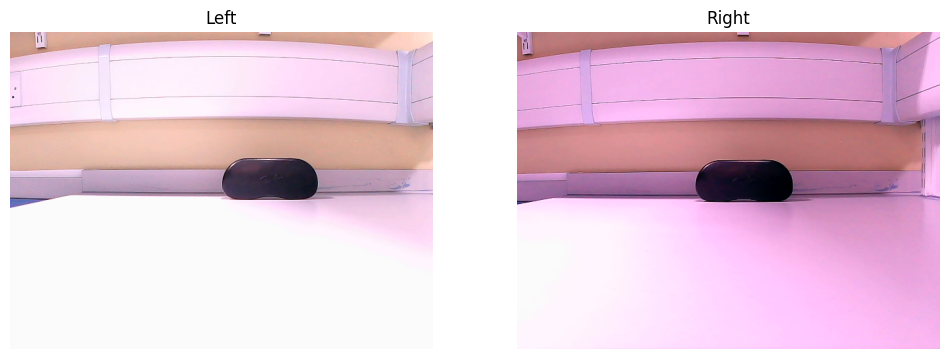

In [16]:
import cv2
from matplotlib import pyplot as plt
import time

# time. sleep(5)  
cam1 = cv2.VideoCapture(0, cv2.CAP_DSHOW) 
cam2 = cv2.VideoCapture(1, cv2.CAP_DSHOW) 
  
result1, l_img = cam1.read()
result2, r_img = cam2.read() 

cam1.release()
cam2.release()

cv2.imwrite("left.png", l_img)
cv2.imwrite("right.png", r_img)

fig = plt.figure(figsize=(12, 5)) 

fig.add_subplot(1, 2, 1) 
plt.imshow(l_img) 
plt.axis('off')
plt.title("Left") 

fig.add_subplot(1, 2, 2) 
plt.imshow(r_img) 
plt.axis('off')
plt.title("Right") 

Capture Images fro Calibration

In [17]:
# import cv2
# import os

# num_images = 1000

# left_folder = 'left_calibration'
# right_folder = 'right_calibration'

# os.makedirs(left_folder, exist_ok=True)
# os.makedirs(right_folder, exist_ok=True)

# cam1 = cv2.VideoCapture(0, cv2.CAP_DSHOW)
# cam2 = cv2.VideoCapture(1, cv2.CAP_DSHOW)


# cv2.namedWindow('Calibration Images', cv2.WINDOW_NORMAL)

# for i in range(num_images):
#     # Read frames from both webcams
#     ret1, frame1 = cam1.read()
#     ret2, frame2 = cam2.read()

#     # Display frames
#     cv2.imshow('Calibration Images', cv2.hconcat([frame1, frame2]))
#     cv2.imshow('Calibration Left Images', cv2.hconcat([frame1]))
#     cv2.imshow('Calibration Right Images', cv2.hconcat([frame2]))


#     # Save frames to folders when a key is pressed
#     key = cv2.waitKey(0) & 0xFF
#     if key == 27: 
#         break
#     elif key == 32: 
#         cv2.imwrite(os.path.join(left_folder, f'img_{i+1}.png'), frame1)
#         cv2.imwrite(os.path.join(right_folder, f'img_{i+1}.png'), frame2)
#         print(f"Image {i+1} captured and saved.")

# # Release resources
# cam1.release()
# cam2.release()
# cv2.destroyAllWindows()


Image 1 captured and saved.
Image 2 captured and saved.
Image 3 captured and saved.
Image 4 captured and saved.
Image 5 captured and saved.
Image 6 captured and saved.
Image 7 captured and saved.
Image 8 captured and saved.
Image 9 captured and saved.
Image 10 captured and saved.
Image 11 captured and saved.
Image 12 captured and saved.
Image 13 captured and saved.
Image 14 captured and saved.
Image 15 captured and saved.
Image 16 captured and saved.
Image 17 captured and saved.
Image 18 captured and saved.
Image 19 captured and saved.
Image 20 captured and saved.
Image 21 captured and saved.
Image 22 captured and saved.
Image 23 captured and saved.
Image 24 captured and saved.
Image 25 captured and saved.
Image 26 captured and saved.
Image 27 captured and saved.
Image 28 captured and saved.
Image 29 captured and saved.
Image 30 captured and saved.
Image 31 captured and saved.
Image 32 captured and saved.
Image 33 captured and saved.
Image 34 captured and saved.
Image 35 captured and s

Chessboard Pre-Calibration

In [1]:
import numpy as np
import cv2
import glob
import os
from matplotlib import pyplot as plt

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((9*6,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space

imgpointsL = [] # 2d points in image plane.
imagesL = sorted(glob.glob('./left_calibration/*.png'))
imgpointsR = [] # 2d points in image plane.
imagesR = sorted(glob.glob('./right_calibration/*.png'))

i = 0
for fnameL, fnameR in zip(imagesL, imagesR):
    i = i + 1
    imgL = cv2.imread(fnameL)
    imgR = cv2.imread(fnameR)
    grayL = cv2.cvtColor(imgL, cv2.COLOR_BGR2GRAY)
    grayR = cv2.cvtColor(imgR, cv2.COLOR_BGR2GRAY)
    
    # Find the chess board corners
    retL, cornersL = cv2.findChessboardCorners(grayL, (9,6), None)
    retR, cornersR = cv2.findChessboardCorners(grayR, (9,6), None)
    
    # If found, add object points, image points (after refining them)
    if retL == True:
        objpoints.append(objp)
        
        corners2L = cv2.cornerSubPix(grayL,cornersL, (11,11), (-1,-1), criteria)
        imgpointsL.append(corners2L)
        
        corners2R = cv2.cornerSubPix(grayR,cornersR, (11,11), (-1,-1), criteria)
        imgpointsR.append(corners2R)        
        
        # Draw and display the corners
        cv2.drawChessboardCorners(imgL, (9,6), corners2L, retL)
        cv2.drawChessboardCorners(imgR, (9,6), corners2R, retR)

    folder_nameL = "Detected_Checkerboard_Left_Camera"
    if not os.path.exists(folder_nameL):
        os.makedirs(folder_nameL)
        
    folder_nameR = "Detected_Checkerboard_Right_Camera"
    if not os.path.exists(folder_nameR):
        os.makedirs(folder_nameR)
        
    image_pathL = os.path.join(folder_nameL, f"image_{i}.png")
    cv2.imwrite(image_pathL, imgL)

    image_pathR = os.path.join(folder_nameR, f"image_{i}.png")
    cv2.imwrite(image_pathR, imgR)

Calibration & Rectification

In [2]:
import numpy as np
import cv2
import glob

# Calibrate cameras
retL, mtxL, distL, rvecsL, tvecsL = cv2.calibrateCamera(objpoints, imgpointsL, grayL.shape[::-1], None, None)
retR, mtxR, distR, rvecsR, tvecsR = cv2.calibrateCamera(objpoints, imgpointsR, grayR.shape[::-1], None, None)

# Calibrating left camera
hL,wL= grayL.shape[:2]
new_mtxL, roiL= cv2.getOptimalNewCameraMatrix(mtxL,distL,(wL,hL),1,(wL,hL))
# 
# Calibrating right camera
hR,wR= grayL.shape[:2]
new_mtxR, roiR= cv2.getOptimalNewCameraMatrix(mtxR,distR,(wR,hR),1,(wR,hR))

# Stereo calibration
flags = 0
flags |= cv2.CALIB_FIX_INTRINSIC

ret_stereo, _, _, _, _, R, T, E, F = cv2.stereoCalibrate(objpoints, imgpointsL, imgpointsR, mtxL, distL, mtxR, distR, grayL.shape[::-1], criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001), flags=flags)

# Rectification
R1, R2, P1, P2, Q, _, _ = cv2.stereoRectify(mtxL, distL, mtxR, distR, grayL.shape[::-1], R, T)

# Map for rectification
left_maps = cv2.initUndistortRectifyMap(mtxL, distL, R1, P1, grayL.shape[::-1], cv2.CV_16SC2)
right_maps = cv2.initUndistortRectifyMap(mtxR, distR, R2, P2, grayR.shape[::-1], cv2.CV_16SC2)

cv2_file = cv2.FileStorage('stereoMap.xml', cv2.FILE_STORAGE_WRITE)

cv2_file.write('stereoMapL_x',left_maps[0])
cv2_file.write('stereoMapL_y',left_maps[1])
cv2_file.write('stereoMapR_x',right_maps[0])
cv2_file.write('stereoMapR_y',right_maps[1])

cv2_file.release()

Open camera parameters xml file (Raheel)

In [4]:
import cv2

# Camera parameters to undistort and rectify images
cv_file = cv2.FileStorage()
cv_file.open('stereoMap_27_01.xml', cv2.FileStorage_READ)

left_maps_x = cv_file.getNode('stereoMapL_x').mat()
left_maps_y = cv_file.getNode('stereoMapL_y').mat()
left_maps_x = cv_file.getNode('stereoMapR_x').mat()
left_maps_y = cv_file.getNode('stereoMapR_y').mat()

Undistort and Rectify Images (Raheel)

In [5]:
import cv2
import numpy as np

# Load stereo images
img_left = cv2.imread("img_117_l.png")
img_right = cv2.imread("img_117_r.png")

# Rectify stereo images using the rectification maps
rectified_left = cv2.remap(img_left, left_maps_x, left_maps_y, cv2.INTER_LINEAR)
rectified_right = cv2.remap(img_right, left_maps_x, left_maps_y, cv2.INTER_LINEAR)

cv2.imwrite("rectified_left.png", rectified_left)
cv2.imwrite("rectified_right.png", rectified_right)


True

Disparity Map Extraction (Raheel)

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def stereo_fusion(left_image, right_image):
    left_gray = cv2.cvtColor(left_image, cv2.COLOR_BGR2GRAY)
    right_gray = cv2.cvtColor(right_image, cv2.COLOR_BGR2GRAY)

    # stereo = cv2.StereoBM_create(numDisparities=16*7, blockSize=11)
    stereo = cv2.StereoSGBM_create(0, 16*8, 9)



    disparity = stereo.compute(left_gray, right_gray)
    # # Normalize and apply a color map
    disparity = cv2.normalize(src=disparity, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
    disparity = cv2.applyColorMap(disparity, cv2.COLORMAP_JET)

    # Normalize the image for representation
    # min = disparity.min()
    # max = disparity.max()
    # disparity = np.uint8(255 * (disparity - min) / (max - min))
    # disparity = cv2.normalize(disparity_map, disparity_map, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

    return disparity

left_image = cv2.imread('view1.png')
right_image = cv2.imread('view5.png')
result_image1 = stereo_fusion(left_image, right_image)

# left_image = cv2.imread('rectified_left.png')
# right_image = cv2.imread('rectified_right.png')
# result_image2 = stereo_fusion(left_image, right_image)

# cv2.imwrite("disparity_map_before.png", result_image1)
# cv2.imwrite("disparity_map_after.png", result_image2)
cv2.imwrite("disparity_map_good.png", result_image1)

cv2.imshow("Before", result_image1)
# cv2.imshow("After", result_image2)
cv2.waitKey(0)
cv2.destroyAllWindows()


Trying other disparity methods

In [3]:
import numpy as np
import cv2

def stereo_fusion_depth(left_image, right_image, focal_length, baseline_distance):
    left_gray = cv2.cvtColor(left_image, cv2.COLOR_BGR2GRAY)
    right_gray = cv2.cvtColor(right_image, cv2.COLOR_BGR2GRAY)

    stereo = cv2.StereoBM_create(numDisparities=16, blockSize=5)

    disparity = stereo.compute(left_gray, right_gray).astype(np.float32)
    disparity = (disparity/16.0 - minDisparity)/numDisparities
    # Convert disparity to depth
    depth_map = (focal_length * baseline_distance) / disparity

    # Optionally, you can apply some normalization to the depth map if needed
    # min_depth = depth_map.min()
    # max_depth = depth_map.max()
    # depth_map = np.uint8(255 * (depth_map - min_depth) / (max_depth - min_depth))

    depth_map = cv2.applyColorMap(depth_map, cv2.COLORMAP_JET)

    return depth_map

left_image = cv2.imread('left.png')
right_image = cv2.imread('right.png')
result_image1 = stereo_fusion_depth(left_image, right_image, 0.5, 0.075)

# left_image = cv2.imread('rectified_left.png')
# right_image = cv2.imread('rectified_right.png')
# result_image2 = stereo_fusion_depth(left_image, right_image, 0.5, 0.075)

cv2.imwrite("depth_map_before.png", result_image1)
# cv2.imwrite("depth_map_after.png", result_image2)

cv2.imshow("Before", result_image1)
# cv2.imshow("After", result_image2)
cv2.waitKey(0)


NameError: name 'minDisparity' is not defined

In [5]:
# import numpy as np
# import cv2
# import glob

# frameSize = (640,480)

# # Calibrate cameras
# retL, mtxL, distL, rvecsL, tvecsL = cv2.calibrateCamera(objpointsL, imgpointsL, frameSize, None, None)
# retR, mtxR, distR, rvecsR, tvecsR = cv2.calibrateCamera(objpointsL, imgpointsR, frameSize, None, None)

# # Calibrating left camera
# hL,wL,cL = imgL.shape
# new_mtxL, roiL= cv2.getOptimalNewCameraMatrix(mtxL,distL,(wL,hL),1,(wL,hL))

# # Calibrating right camera
# hR,wR,cR = imgL.shape
# new_mtxR, roiR= cv2.getOptimalNewCameraMatrix(mtxR,distR,(wR,hR),1,(wR,hR))

# # Stereo calibration
# flags = 0
# flags |= cv2.CALIB_FIX_INTRINSIC

# criteria_stereo= (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# retStereo, newCameraMatrixL, distL, newCameraMatrixR, distR, rot, trans, essentialMatrix, fundamentalMatrix = cv2.stereoCalibrate(objpointsL, imgpointsL, imgpointsR, new_mtxL, distL, new_mtxR, distR, grayL.shape[::-1], criteria_stereo, flags)


# # Rectification
# rectifyScale= 1
# rectL, rectR, projMatrixL, projMatrixR, Q, roi_L, roi_R= cv2.stereoRectify(newCameraMatrixL, distL, newCameraMatrixR, distR, grayL.shape[::-1], rot, trans, rectifyScale,(0,0))

# left_maps = cv2.initUndistortRectifyMap(newCameraMatrixL, distL, rectL, projMatrixL, grayL.shape[::-1], cv2.CV_16SC2)
# right_maps = cv2.initUndistortRectifyMap(newCameraMatrixR, distR, rectR, projMatrixR, grayR.shape[::-1], cv2.CV_16SC2)

# print("Saving parameters!")
# cv2_file = cv2.FileStorage('stereoMap_nicon.xml', cv2.FILE_STORAGE_WRITE)

# cv2_file.write('stereoMapL_x',left_maps[0])
# cv2_file.write('stereoMapL_y',left_maps[1])
# cv2_file.write('stereoMapR_x',right_maps[0])
# cv2_file.write('stereoMapR_y',right_maps[1])

# cv2_file.release()

Saving parameters!


In [2]:
def nothing(x):
    pass
 
cv2.namedWindow('disp',cv2.WINDOW_NORMAL)
cv2.resizeWindow('disp',1000,1000)
 
cv2.createTrackbar('numDisparities','disp',1,17,nothing)
cv2.createTrackbar('blockSize','disp',5,50,nothing)
cv2.createTrackbar('preFilterType','disp',1,1,nothing)
cv2.createTrackbar('preFilterSize','disp',2,25,nothing)
cv2.createTrackbar('preFilterCap','disp',5,62,nothing)
cv2.createTrackbar('textureThreshold','disp',10,100,nothing)
cv2.createTrackbar('uniquenessRatio','disp',15,100,nothing)
cv2.createTrackbar('speckleRange','disp',0,100,nothing)
cv2.createTrackbar('speckleWindowSize','disp',3,25,nothing)
cv2.createTrackbar('disp12MaxDiff','disp',5,25,nothing)
cv2.createTrackbar('minDisparity','disp',5,25,nothing)
 
# Creating an object of StereoBM algorithm
stereo = cv2.StereoBM_create()

while True:
 

    left_image = cv2.imread('left.png')
    right_image = cv2.imread('right.png')

    left_gray = cv2.cvtColor(left_image, cv2.COLOR_BGR2GRAY)
    right_gray = cv2.cvtColor(right_image, cv2.COLOR_BGR2GRAY)
 

    # Updating the parameters based on the trackbar positions
    numDisparities = cv2.getTrackbarPos('numDisparities','disp')*16
    blockSize = cv2.getTrackbarPos('blockSize','disp')*2 + 5
    preFilterType = cv2.getTrackbarPos('preFilterType','disp')
    preFilterSize = cv2.getTrackbarPos('preFilterSize','disp')*2 + 5
    preFilterCap = cv2.getTrackbarPos('preFilterCap','disp')
    textureThreshold = cv2.getTrackbarPos('textureThreshold','disp')
    uniquenessRatio = cv2.getTrackbarPos('uniquenessRatio','disp')
    speckleRange = cv2.getTrackbarPos('speckleRange','disp')
    speckleWindowSize = cv2.getTrackbarPos('speckleWindowSize','disp')*2
    disp12MaxDiff = cv2.getTrackbarPos('disp12MaxDiff','disp')
    minDisparity = cv2.getTrackbarPos('minDisparity','disp')
     
    # Setting the updated parameters before computing disparity map
    stereo.setNumDisparities(numDisparities)
    stereo.setBlockSize(blockSize)
    stereo.setPreFilterType(preFilterType)
    stereo.setPreFilterSize(preFilterSize)
    stereo.setPreFilterCap(preFilterCap)
    stereo.setTextureThreshold(textureThreshold)
    stereo.setUniquenessRatio(uniquenessRatio)
    stereo.setSpeckleRange(speckleRange)
    stereo.setSpeckleWindowSize(speckleWindowSize)
    stereo.setDisp12MaxDiff(disp12MaxDiff)
    stereo.setMinDisparity(minDisparity)
 
    # Calculating disparity using the StereoBM algorithm
    disparity = stereo.compute(left_gray,right_gray)
    # NOTE: Code returns a 16bit signed single channel image,
    # CV_16S containing a disparity map scaled by 16. Hence it 
    # is essential to convert it to CV_32F and scale it down 16 times.
 
    # Converting to float32 
    disparity = disparity.astype(np.float32)
 
    # Scaling down the disparity values and normalizing them 
    disparity = (disparity/16.0 - minDisparity)/numDisparities
 
    # Displaying the disparity map
    cv2.imshow("disp",disparity)
 
    # Close window using esc key
    if cv2.waitKey(1) == 27:
      break

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\calib3d\src\stereobm.cpp:1193: error: (-211:One of the arguments' values is out of range) numDisparities must be positive and divisible by 16 in function 'cv::StereoBMImpl::compute'
